**Load raw data**

In [1]:
#load library and create subsets
library(dplyr)

samples <- read.table('both_samples_condition.tsv')

#bsamples <- samples %>% filter(tissue == "brain")
#gsamples <- samples %>% filter(tissue == "gut")
gundiffsamples <- samples %>% filter(tissue == "gut", organoid_stage == "undiff")
#gdiffsamples <- samples %>% filter(tissue == "gut", organoid_stage == "diff")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
gundiffsamples

,condition,replicate,organoid_stage,id,name,tissue
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>
S10,VA1,3,undiff,S10,VA1_gut_undiff_S10,gut
S11,HAstV4,2,undiff,S11,HAstV4_gut_undiff_S11,gut
S12,HAstV4,3,undiff,S12,HAstV4_gut_undiff_S12,gut
S4,MLB2,1,undiff,S4,MLB2_gut_undiff_S4,gut
S5,MLB2,2,undiff,S5,MLB2_gut_undiff_S5,gut
S6,MLB2,3,undiff,S6,MLB2_gut_undiff_S6,gut
S1,Mock,1,undiff,S1,Mock_gut_undiff_S1,gut
S2,Mock,2,undiff,S2,Mock_gut_undiff_S2,gut
S3,Mock,3,undiff,S3,Mock_gut_undiff_S3,gut


In [3]:
gpccounts = as.matrix(read.csv('../../output/gut/counts_protein_coding.csv',row.names = 1))
dim(gpccounts)

[1] 20070    24

In [4]:
#load genes (using gut_genes, since brain's one was confused)
ggenes = read.csv('../../output/gut/gut_genes.csv',row.names = 1)
ggenes[1:4,]

,chr,start,end,strand,gene_id,gene_name,gene_biotype
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
ENSG00000279928,1,182696,184174,+,ENSG00000279928,DDX11L17,unprocessed_pseudogene
ENSG00000228037,1,2581560,2584533,+,ENSG00000228037,NA,lncRNA
ENSG00000142611,1,3069168,3438621,+,ENSG00000142611,PRDM16,protein_coding
ENSG00000284616,1,5301928,5307394,-,ENSG00000284616,NA,lncRNA


In [5]:
library(DESeq2)
colours = c(
    HAstV4_diff='#b80101',
    HAstV4='#ff9301',
    HAstV4_undiff='#ffc101',
    MLB2_diff='#7b0fa6',
    MLB2='#592bf5',
    MLB2_undiff='#679ffa',
    VA1_diff='#1a5d3a',
    VA1='#1fbd6b',
    VA1_undiff='#82de25',
    Mock_diff='#4b4b49',
    Mock='#919190',
    Mock_undiff='#c5c5c0',
    diff='#aa05b2',
    undiff='#f68ed7')

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, saveRDS, setdiff,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:dplyr’:

    first, rename


The following object is masked from ‘package:utils’:

    findMatches


The following objects are m

In [6]:
gpccounts = gpccounts[,rownames(gundiffsamples)]
gpccounts

,S10,S11,S12,S4,S5,S6,S1,S2,S3,S7,S8,S9
ENSG00000142611,247,314,242,382,382,361,450,315,469,374,252,304
ENSG00000157911,94,141,148,170,132,138,175,126,166,179,71,96
ENSG00000142655,73,189,146,74,83,175,116,126,50,104,112,104
ENSG00000149527,0,33,0,3,10,0,14,18,15,27,0,0
ENSG00000171621,91,51,162,168,50,119,173,54,56,97,128,175
ENSG00000142583,26,7,13,14,22,5,17,21,29,12,15,46
ENSG00000173614,74,132,85,136,61,191,113,105,134,50,95,119
ENSG00000162592,0,9,0,6,0,0,0,0,9,0,0,0
ENSG00000204624,0,0,0,0,0,0,0,0,0,0,0,0
ENSG00000142606,38,21,15,74,19,58,19,0,61,24,31,20


In [7]:
colnames(gpccounts)
rownames(gundiffsamples)

[1] "S10" "S11" "S12" "S4"  "S5"  "S6"  "S1"  "S2"  "S3"  "S7"  "S8"  "S9"

[1] "S10" "S11" "S12" "S4"  "S5"  "S6"  "S1"  "S2"  "S3"  "S7"  "S8"  "S9"

**DeSeq**

In [8]:
rownames(gundiffsamples) = colnames(gpccounts) = gundiffsamples$name
deseq = DESeqDataSetFromMatrix(countData = gpccounts,
                              colData = gundiffsamples,
                               design = ~ condition)
deseq

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


class: DESeqDataSet 
dim: 20070 12 
metadata(1): version
assays(1): counts
rownames(20070): ENSG00000142611 ENSG00000157911 ... ENSG00000268674
  ENSG00000277475
rowData names(0):
colnames(12): VA1_gut_undiff_S10 HAstV4_gut_undiff_S11 ...
  VA1_gut_undiff_S8 HAstV4_gut_undiff_S9
colData names(6): condition replicate ... name tissue

In [9]:
print (nrow(deseq))

[1] 20070


In [11]:
#filter the 'deseq' dataset, retaining only genes that have at least 3 samples with counts greater than or equal to 10.
smallestGroupSize <- 3
deseq = deseq[rowSums(counts(deseq) >= 10) >= smallestGroupSize, ]

In [12]:
#Size factors are estimated for each sample in the dataset and used to scale the counts, making them comparable across samples.
deseq <- estimateSizeFactors(deseq)

using ntop=500 top features by variance



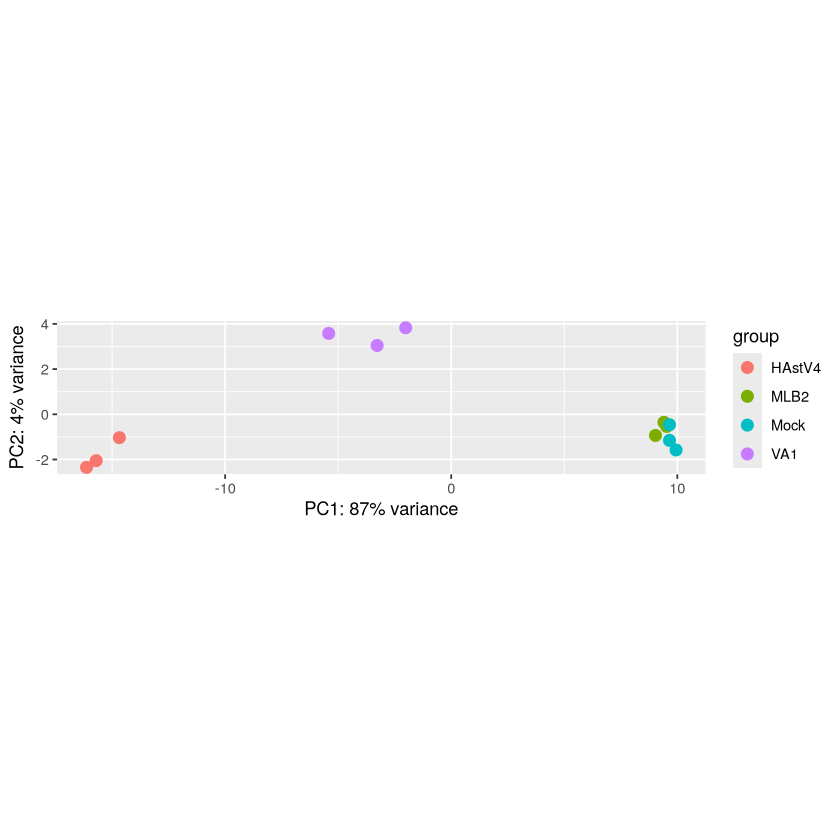

In [14]:
#stabilizes the variance across different expression levels.
#Apply a "variance stabilising transformation" to the data - this is just used for plotting.
vsd <- vst(deseq, blind=TRUE)
plotPCA(vsd)

In [15]:
#return the variance-stabilized count matrix 
vsd = assay(vsd)

In [16]:
# Install biomaRt if you haven't installed it yet
install.packages("BiocManager")
BiocManager::install("biomaRt")

# Load the package
library(biomaRt)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.2 (2024-10-31)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'biomaRt'”
Old packages: 'bit', 'bit64', 'bslib', 'caret', 'cli', 'clock', 'cluster',
  'commonmark', 'cpp11', 'curl', 'data.table', 'GenomeInfoDb', 'gower',
  'hardhat', 'httr2', 'jsonlite', 'knitr', 'locfit', 'MASS', 'Matrix', 'mime',
  'nlme', 'openssl', 'parallelly', 'processx', 'ps', 'purrr', 'R6',
  'RcppArmadillo', 'readxl', 'recipes', 'SparseArray', 'systemfonts',
  'textshaping', 'tinytex', 'tzdb', 'xfun', 'xml2', 'zoo'



In [17]:
#Check there are no duplicate gene names in the counts table. Should be TRUE.
nrow(gpccounts) == length(unique(rownames(gpccounts)))

[1] TRUE

In [18]:
#Read the BiomaRt database to get the HGNC IDs for the genes (rather than the ENSEMBL IDs)
#Get the unique gene names
allgenes = unique(rownames(gpccounts))

In [19]:
#Link to the database
hostname = 'hsapiens'
ensembl = useEnsembl('ENSEMBL_MART_ENSEMBL',
                     paste0(hostname, "_gene_ensembl"),
                     version=110)

ERROR: [1m[33mError[39m in `req_perform()`:[22m
[33m![39m Failed to perform HTTP request.
[1mCaused by error in `curl::curl_fetch_memory()`:[22m
[33m![39m Timeout was reached [www.ensembl.org]: Operation timed out after 10002 milliseconds with 0 bytes received
